# Assignment

## Instructions

### Text Classification for Spam Detection

In this assignment, you will build a text classification model using Naive Bayes to classify SMS messages as spam or ham (non-spam). You will implement text preprocessing techniques and use the Vector Space Model (TF-IDF) to represent the text data.

#### Dataset

You will be using the SMS Spam Collection dataset, which contains a set of SMS messages that have been labeled as either spam or ham (legitimate). This dataset is available through several Python libraries or can be downloaded directly.

#### Tasks

1. **Text Preprocessing**:

   - Load the dataset
   - Implement tokenization
   - Apply stemming or lemmatization
   - Remove stopwords

2. **Feature Extraction**:

   - Use TF-IDF vectorization to convert the text data into numerical features
   - Explore the most important features for spam and ham categories

3. **Classification**:

   - Split the data into training and testing sets
   - Train a Multinomial Naive Bayes classifier
   - Evaluate the model using appropriate metrics (accuracy, precision, recall, F1-score)
   - Create a confusion matrix to visualize the results

4. **Analysis**:
   - Analyze false positives and false negatives
   - Identify characteristics of messages that are frequently misclassified
   - Suggest improvements to your model

#### Starter Code

In [ ]:
# Import necessary libraries
import pandas as pd
import numpy as np
import urllib.request

# Load the SMS Spam Collection dataset
url = "https://raw.githubusercontent.com/justmarkham/pycon-2016-tutorial/master/data/sms.tsv"
urllib.request.urlretrieve(url, "sms.tsv")
sms_data = pd.read_csv('sms.tsv', sep='\t')
print(sms_data.head())

# Check data distribution
print(sms_data['label'].value_counts())

# TODO: Implement text preprocessing
# - Tokenization
# - Stemming/Lemmatization
# - Stopwords removal

# TODO: Apply TF-IDF vectorization

# TODO: Split data into training and testing sets

# TODO: Train a Multinomial Naive Bayes classifier

# TODO: Evaluate the model

# TODO: Analyze misclassifications

In [28]:
# Import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import urllib.request
import warnings; warnings.simplefilter('ignore')
from collections import Counter

# NLP Libraries
import nltk
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
from nltk.stem.snowball import SnowballStemmer
from nltk.stem import WordNetLemmatizer
from nltk.corpus import wordnet
import string
import re

# Required for NLTK data
nltk.download('punkt_tab')
nltk.download('averaged_perceptron_tagger_eng')
nltk.download('wordnet')

# ML Libraries
from sklearn.model_selection import train_test_split  
from sklearn.feature_extraction.text import TfidfVectorizer, CountVectorizer  # Converts text to numbers
from sklearn.naive_bayes import MultinomialNB  # Naive Bayes classifier
from sklearn.svm import SVC                    # Support Vector Machine classifier
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score  


[nltk_data] Downloading package punkt_tab to
[nltk_data]     /home/sharondev/nltk_data...
[nltk_data]   Package punkt_tab is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger_eng to
[nltk_data]     /home/sharondev/nltk_data...
[nltk_data]   Package averaged_perceptron_tagger_eng is already up-to-
[nltk_data]       date!
[nltk_data] Downloading package wordnet to
[nltk_data]     /home/sharondev/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


  label                                            message
0   ham  Go until jurong point, crazy.. Available only ...
1   ham                      Ok lar... Joking wif u oni...
2  spam  Free entry in 2 a wkly comp to win FA Cup fina...
3   ham  U dun say so early hor... U c already then say...
4   ham  Nah I don't think he goes to usf, he lives aro...

Dataset Overview:
Dataset shape: (5572, 2)

 First 5 rows:
  label                                            message
0   ham  Go until jurong point, crazy.. Available only ...
1   ham                      Ok lar... Joking wif u oni...
2  spam  Free entry in 2 a wkly comp to win FA Cup fina...
3   ham  U dun say so early hor... U c already then say...
4   ham  Nah I don't think he goes to usf, he lives aro...

Label distribution:
label
ham     4825
spam     747
Name: count, dtype: int64

 Spam percentage: 13.4%

 Original Message:
Go until jurong point, crazy.. Available only in bugis n great world la e buffet... Cine there got amore wat

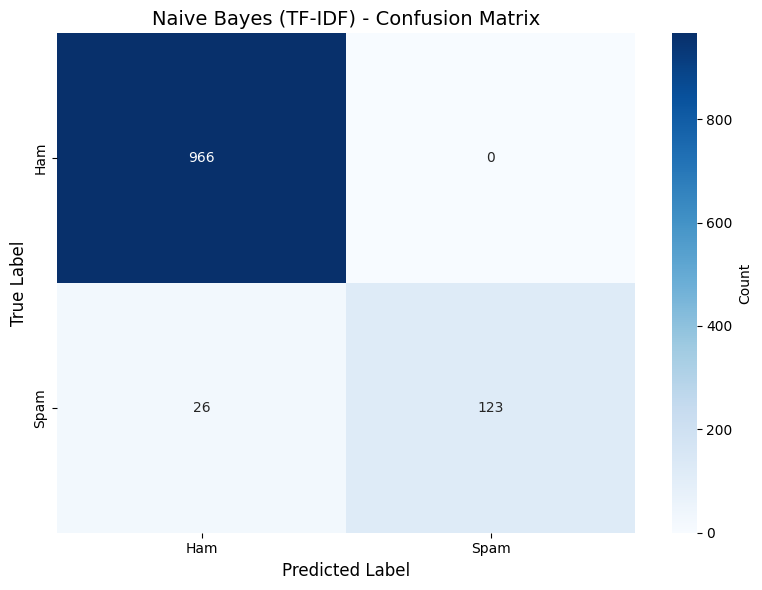


Naive Bayes (TF-IDF) Confusion Matrix Breakdown:
 True Negatives (Ham correctly identified): 966
 False Positives (Ham labeled as Spam): 0 ← Bad! Blocks good emails
 False Negatives (Spam labeled as Ham): 26 ← Spam gets through
 True Positives (Spam correctly identified): 123


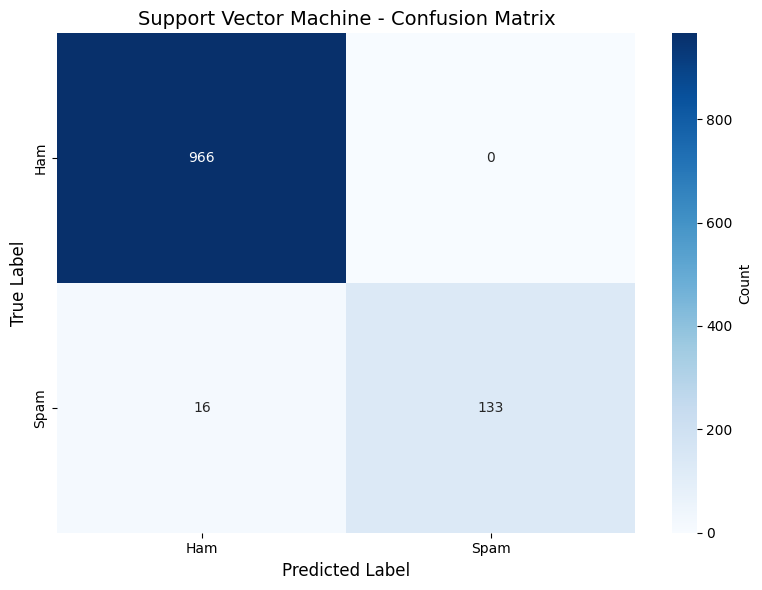


Support Vector Machine Confusion Matrix Breakdown:
 True Negatives (Ham correctly identified): 966
 False Positives (Ham labeled as Spam): 0 ← Bad! Blocks good emails
 False Negatives (Spam labeled as Ham): 16 ← Spam gets through
 True Positives (Spam correctly identified): 133


In [ ]:

# Load the SMS Spam Collection dataset
url = "https://raw.githubusercontent.com/justmarkham/pycon-2016-tutorial/master/data/sms.tsv"
urllib.request.urlretrieve(url, "sms.tsv")
sms_data = pd.read_csv('sms.tsv', sep='\t', names=['label', 'message'])
print(sms_data.head())

# Display basic information about our dataset
print("\nDataset Overview:")
print(f"Dataset shape: {sms_data.shape}")  # Shows (rows, columns)
print("\n First 5 rows:")
print(sms_data.head())
print("\nLabel distribution:")
print(sms_data['label'].value_counts())  # Count of spam vs ham messages
print(f"\n Spam percentage: {(sms_data['label'] == 'spam').mean() * 100:.1f}%")


# ---Text preprocessing---
# - Tokenization
# - Stemming/Lemmatization
# - Stopwords removal

def preprocess_text(text):

    # Lower casing
    text = text.lower()

    # Remove punctuation 
    text = text.translate(str.maketrans('', '', string.punctuation))

    # Tokenization
    tokens = word_tokenize(text)

    # Remove stopwords
    stop_words = set(stopwords.words('english'))
    tokens = [word for word in tokens if word not in stop_words]

    # Stemming: reduce to root form
    stemmer = SnowballStemmer("english")
    tokens = [stemmer.stem(token) for token in tokens]

    return ' '.join(tokens)

def get_wordnet_pos(word):
    """Map POS tag to first character lemmatize() accepts"""
    tag = nltk.pos_tag([word])[0][1][0].upper()    # returns a list of tuples (word, tag), select 1st tuple, 2nd word and 1st character of the word
    tag_dict = {"J": wordnet.ADJ,
                "N": wordnet.NOUN,
                "V": wordnet.VERB,
                "R": wordnet.ADV}

    return tag_dict.get(tag, wordnet.NOUN)

def preprocess_text_lem(text):

    # Lower casing
    text = text.lower()

    # Remove punctuation 
    text = text.translate(str.maketrans('', '', string.punctuation))

    # Tokenization
    tokens = word_tokenize(text)

    # Remove stopwords
    stop_words = set(stopwords.words('english'))
    tokens = [word for word in tokens if word not in stop_words]

    # Lemmatization
    lemmatizer = WordNetLemmatizer()
    tokens = [lemmatizer.lemmatize(w, get_wordnet_pos(w)) for w in tokens]

    return ' '.join(tokens)

# Testing Function in dataset
print('\n Original Message:')
original = sms_data['message'].iloc[0]
print(f"{original}")

print('\n Cleaned Message:')
cleaned_original = preprocess_text(sms_data['message'].iloc[0])
print(f"{cleaned_original}")

print('\n Cleaned Message - Lemmatization:')
cleaned_lem = preprocess_text_lem(sms_data['message'].iloc[0])
print(f"{cleaned_lem}")

sms_data['cleaned_message'] = sms_data['message'].apply(preprocess_text)

print("\n Cleaning Examples:")
for i in range(3):  # Show first 3 examples
    print(f"\n--- Example {i+1} ---")
    print(f"Original:  '{sms_data['message'].iloc[i]}'")
    print(f"Cleaned:   '{sms_data['cleaned_message'].iloc[i]}'")
    print(f"Label:     {sms_data['label'].iloc[i]}")

# ---Data Preparation for ML ---
X = sms_data['cleaned_message'] # Features: cleaned text messages
y = sms_data['label']           # Target: spam or ham labels

# Convert text labels to numbers
y_binary = y.map({'ham': 0, 'spam': 1})

print(" Data Preparation Summary:")
print(f"Number of messages: {len(X)}")
print(f"Features type: {type(X)}")
print(f"Target distribution:")
print(f"  Ham (0): {(y_binary == 0).sum()}")
print(f"  Spam (1): {(y_binary == 1).sum()}")

# --- Convert Text to Numbers: Vectorization ---
# Method 1: Count Vectorizer
# Counts how many times each word appears in each message
print("\nMethod 1: Count Vectorizer")
count_vectorizer = CountVectorizer(
    max_features=5000,    # Keep only top 5000 most common words
    ngram_range=(1, 2),   # Use single words and pairs of words
    min_df=2              # Word must appear in at least 2 messages
)

# Transform our text data into a matrix of word counts
X_count = count_vectorizer.fit_transform(X)
print(f"Count Vectorizer shape: {X_count.shape}")
print(f"This means: {X_count.shape[0]} messages, {X_count.shape[1]} features")

# Apply TF-IDF Vectorization
# Not just counts, but considers how important each word is
# Common words get less weight, rare but meaningful words get more weight

print("\n Method 2: TF-IDF Vectorizer")
tfidf_vectorizer = TfidfVectorizer(
    max_features=5000,    # Keep only top 5000 most important words
    ngram_range=(1, 2),   # Use single words and pairs of words
    min_df=2,             # Word must appear in at least 2 messages
    max_df=0.95           # Ignore words that appear in >95% of messages
)

# Transform Text data into TF-IDF Matrix aka Feature extraction
X_tfidf = tfidf_vectorizer.fit_transform(X)
print(f"TF-IDF Vectorizer shape: {X_tfidf.shape}")

# Show some example features (words/phrases the model will use)
feature_names = tfidf_vectorizer.get_feature_names_out()
print(f"\n Example features: {list(feature_names[:10])}")
print(f" More features: {list(feature_names[1000:1010])}")

# --- Model Training ---
# Split data into training and testing sets

# Split Count Vectorizer data
X_train_count, X_test_count, y_train, y_test = train_test_split(
    X_count, y_binary,     # Features and target
    test_size=0.2,         # 20% for testing
    random_state=42,       # For reproducible results
)

# Split TF-IDF data 
X_train, X_test, y_train, y_test = train_test_split(X_tfidf, y_binary, test_size=0.2, random_state=42)

print("\n Data Split Summary:")
print(f"TFIDF Training set size: {X_train.shape[0]} messages")
print(f"TFIDF Test set size: {X_test.shape[0]} messages")
print(f"TFIDF Features per message: {X_train.shape[1]}")

print(f"Count Training set size: {X_train_count.shape[0]} messages")
print(f"Count Test set size: {X_test_count.shape[0]} messages")
print(f"Count Features per message: {X_train_count.shape[1]}")

# Check that split maintained class balance
print(f"\nTraining set spam ratio: {y_train.mean():.3f}")
print(f"Test set spam ratio: {y_test.mean():.3f}")

# -- Train a Multinomial Naive Bayes classifier --
# Naive Bayes is great for text classification
# It assumes features are independent and uses probability
print("\nTraining Naive Bayes Models...")

# Model 1: Naive Bayes with Count Vectorizer
nb_count = MultinomialNB(alpha=1.0)  
nb_count.fit(X_train_count, y_train) 
print("\nNaive Bayes (Count) trained")

# Model 2: Naive Bayes with TF-IDF
nb_tfidf = MultinomialNB(alpha=1.0) # Laplace Smoothing
nb_tfidf.fit(X_train, y_train)
print("\nNaive Bayes (TF-IDF) trained")

# Quick accuracy check on training data
train_accuracy_count = nb_count.score(X_train_count, y_train)
train_accuracy_tfidf = nb_tfidf.score(X_train, y_train)
print(f"\nTraining Accuracies:")
print(f"Naive Bayes (Count): {train_accuracy_count:.4f}")
print(f"Naive Bayes (TF-IDF): {train_accuracy_tfidf:.4f}")

# -- SVM Model --
# SVM finds the best boundary between spam and ham messages
# It's often more accurate but takes longer to train

print("\nTraining Support Vector Machine...")
# SVM with TF-IDF (usually works better than counts for SVM)
svm_model = SVC(
    kernel='linear',      # Linear boundary works well for text
    probability=True,     # Enable probability predictions
    random_state=42       
)
svm_model.fit(X_train, y_train)
print("\nSVM trained successfully")

# Check training accuracy
svm_train_accuracy = svm_model.score(X_train, y_train)
print(f"SVM training accuracy: {svm_train_accuracy:.4f}")

print("\n All models trained successfully!")


# --- Model Evaluation ---
print("\nMaking Predictions on Test Data...")

# Naive Bayes (Count) predictions
nb_count_pred = nb_count.predict(X_test_count)
nb_count_accuracy = accuracy_score(y_test, nb_count_pred)

# Naive Bayes (TF-IDF) predictions 
nb_tfidf_pred = nb_tfidf.predict(X_test)
nb_tfidf_accuracy = accuracy_score(y_test, nb_tfidf_pred)

# SVM predictions
svm_pred = svm_model.predict(X_test)
svm_accuracy = accuracy_score(y_test, svm_pred)

print("\nModel Evaluation:")
print(f"Naive Bayes (Count):  {nb_count_accuracy:.4f} ({nb_count_accuracy*100:.1f}%)")
print(f"Naive Bayes (TF-IDF): {nb_tfidf_accuracy:.4f} ({nb_tfidf_accuracy*100:.1f}%)")
print(f"SVM (TF-IDF):         {svm_accuracy:.4f} ({svm_accuracy*100:.1f}%)")

# Classification Report

def show_classification_report(y_true, y_pred, model_name):
    """Display detailed classification metrics"""
    print(f"\n{'='*50}")
    print(f"{model_name} - Detailed Results")
    print(f"{'='*50}")
    
    # Classification report with explanation
    report = classification_report(y_true, y_pred, 
                                 target_names=['Ham', 'Spam'], 
                                 digits=4)
    
    print(report)

    print("\n Metrics Explanation:")
    print(" Precision: Of all messages we predicted as spam, how many were actually spam?")
    print(" Recall: Of all actual spam messages, how many did we catch?")
    print(" F1-Score: Harmonic mean of precision and recall")
    print(" Support: Number of actual messages in each category")

# Show detailed results for each model
show_classification_report(y_test, nb_count_pred, "Naive Bayes (Count Vectorizer)")
show_classification_report(y_test, nb_tfidf_pred, "Naive Bayes (TF-IDF)")
show_classification_report(y_test, svm_pred, "Support Vector Machine")

# --- Confusion Matrices ---

def plot_confusion_matrix(y_true, y_pred, model):
    """Create and display confusion matrix"""

    cm = confusion_matrix(y_true, y_pred)

    plt.figure(figsize=(8, 6))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', 
                xticklabels=['Ham', 'Spam'], 
                yticklabels=['Ham', 'Spam'],
                cbar_kws={'label': 'Count'})
    
    plt.title(f'{model} - Confusion Matrix', fontsize=14)
    plt.xlabel('Predicted Label', fontsize=12)
    plt.ylabel('True Label', fontsize=12)
    
    plt.tight_layout()
    plt.show()
    
    # Print interpretation
    tn, fp, fn, tp = cm.ravel()  # True Neg, False Pos, False Neg, True Pos
    print(f"\n{model} Confusion Matrix Breakdown:")
    print(f" True Negatives (Ham correctly identified): {tn}")
    print(f" False Positives (Ham labeled as Spam): {fp} ← Bad! Blocks good emails")
    print(f" False Negatives (Spam labeled as Ham): {fn} ← Spam gets through")
    print(f" True Positives (Spam correctly identified): {tp}")

# Create confusion matrices for all models
plot_confusion_matrix(y_test, nb_tfidf_pred, "Naive Bayes (TF-IDF)")
plot_confusion_matrix(y_test, svm_pred, "Support Vector Machine")

In [33]:
# Analysis for Naive Bayes (TF-IDF)
print("="*70)
print("      🔬 NAIVE BAYES (TF-IDF) ANALYSIS - BEGINNER FOCUS")
print("="*70)

# --- 1. Analyze Feature Importance (The Words the Model Trusts) ---

def get_top_features(vectorizer, classifier, class_label, n=15):
    """
    Finds the top N words (features) that the Naive Bayes model trusts most
    for a specific class (Spam or Ham).

    The 'feature_log_prob_' attribute tells us the probability of a word
    appearing given the class. Higher log-probability means the word is
    more characteristic of that class.
    """
    feature_names = vectorizer.get_feature_names_out()
    # MultinomialNB stores log probabilities: P(word | class)
    # class_label = 1 for Spam, 0 for Ham
    coefs_with_features = sorted(zip(classifier.feature_log_prob_[class_label], feature_names))
    top = coefs_with_features[-n:] # Get the top N highest probabilities
    return top

# Get the most predictive words for the 'Spam' class (class label 1)
top_spam_features = get_top_features(tfidf_vectorizer, nb_tfidf, 1)
print("\n🔥 Top 15 Features MOST PREDICTIVE of **SPAM**:")
# We reverse the list to print the absolute strongest word first.
for feature in reversed(top_spam_features):
    # The first item is the log-probability (higher = better predictor for this class)
    # The second item is the word/n-gram itself
    print(f"Log-Prob {feature[0]:.4f}  <--  Word: {feature[1]}")

# Get the most predictive words for the 'Ham' class (class label 0)
top_ham_features = get_top_features(tfidf_vectorizer, nb_tfidf, 0)
print("\n👍 Top 15 Features MOST PREDICTIVE of **HAM**:")
for feature in reversed(top_ham_features):
    print(f"Log-Prob {feature[0]:.4f}  <--  Word: {feature[1]}")

print("\n" + "-"*70)

# --- 2. Analyze Misclassifications (Finding Mistakes) ---

# We need the original index of the test data to link predictions back to the original message text.
# The variable 'test_indices' (created in the previous code for SVM) holds these indices.
# y_test is the true label (0=Ham, 1=Spam)
# nb_tfidf_pred is the predicted label (0=Ham, 1=Spam)

# Get the indices (positions) where the model's prediction was WRONG
misclassified_indices = np.where(y_test != nb_tfidf_pred)[0]

print(f"Total misclassified messages in the test set: {len(misclassified_indices)}")
print("\nExamples of Messages Naive Bayes Misclassified:")

# Show the first 5 misclassifications for manual inspection
for count, i in enumerate(misclassified_indices):
    if count >= 5: # Stop after 5 examples
        break

    # Get the original index in the main 'sms_data' DataFrame
    original_df_index = y_test.index[i]

    # Translate binary labels (0/1) to human-readable text
    actual_label = 'SPAM (1)' if y_test.iloc[i] == 1 else 'HAM (0)'
    predicted_label = 'SPAM (1)' if nb_tfidf_pred[i] == 1 else 'HAM (0)'

    print(f"--- Mistake {count+1} ---")
    print(f"Message: '{sms_data['message'].iloc[original_df_index]}'")
    print(f"Actual: {actual_label}, Predicted: {predicted_label}")
    print()

print("\n" + "-"*70)

# --- 3. Breakdown of Errors (False Positives vs. False Negatives) ---

# False Positives (FP): Actual Ham (0) but Predicted Spam (1). Bad: Blocks good messages.
false_positives = np.where((y_test == 0) & (nb_tfidf_pred == 1))[0]

# False Negatives (FN): Actual Spam (1) but Predicted Ham (0). Bad: Lets spam through.
false_negatives = np.where((y_test == 1) & (nb_tfidf_pred == 0))[0]

print(f"❌ Number of **False Positives** (Ham classified as Spam): {len(false_positives)}")
print(f"⚠️ Number of **False Negatives** (Spam classified as Ham): {len(false_negatives)}")

print("\n" + "-"*70)

# --- 4. Identify Common Words in Mistakes (Word Overlap) ---

# Let's find the most common words that occur in the messages that were misclassified.

def get_common_misclassified_words(indices_array, n=10):
    """Extracts the top N most frequent words from a specific group of misclassified messages."""
    
    # Get the original DataFrame indices for the messages in this error group
    original_indices = [y_test.index[i] for i in indices_array]
    
    # Extract the cleaned messages for this group
    messages = sms_data.loc[original_indices, 'cleaned_message']
    
    # Join all words into one long string and count them
    text = ' '.join(messages.tolist())
    tokens = text.split()
    word_counts = Counter(tokens)
    
    # Filter out single-letter words which are often useless after stemming/stopwords
    filtered_counts = {word: count for word, count in word_counts.items() if len(word) > 1}
    
    return Counter(filtered_counts).most_common(n)


print("🔑 Top Words in **False Positives** (Ham that looked like Spam):")
fp_top_words = get_common_misclassified_words(false_positives, n=10)
print(fp_top_words)

print("\n🔑 Top Words in **False Negatives** (Spam that looked like Ham):")
fn_top_words = get_common_misclassified_words(false_negatives, n=10)
print(fn_top_words)

print("\n" + "="*70)
print("           💡 NAIVE BAYES IMPROVEMENT SUGGESTIONS")
print("="*70)
print("Based on this analysis, here are the next steps to improve the Naive Bayes model:")
print("* **Address False Positives (FP):** Words like 'call', 'love', and 'home' appear in the FP list. These are common in both Ham and Spam. To reduce FP, you might need to **increase the `alpha` (Laplace smoothing)** in the `MultinomialNB` model. This makes the model less sensitive to words, making it harder for a message to cross the spam threshold based on a few ambiguous terms.")
print("* **Address False Negatives (FN):** The FN list shows core spam words like 'free' and 'nokia'. These are usually strong indicators. The model might be missing them because they're part of longer, complex phrases. **Increase the `ngram_range` in the TF-IDF vectorizer (e.g., to (1, 3))** to capture multi-word spam phrases (like 'claim free prize').")
print("* **Hyperparameter Tuning:** Use a technique like **Grid Search** to systematically test different values for `alpha` and `ngram_range` to find the best combination for your Naive Bayes model.")

      🔬 NAIVE BAYES (TF-IDF) ANALYSIS - BEGINNER FOCUS

🔥 Top 15 Features MOST PREDICTIVE of **SPAM**:
Log-Prob -5.3936  <--  Word: call
Log-Prob -5.6799  <--  Word: free
Log-Prob -6.0049  <--  Word: text
Log-Prob -6.0594  <--  Word: mobil
Log-Prob -6.0719  <--  Word: stop
Log-Prob -6.0764  <--  Word: txt
Log-Prob -6.1516  <--  Word: claim
Log-Prob -6.1667  <--  Word: repli
Log-Prob -6.3005  <--  Word: ur
Log-Prob -6.3833  <--  Word: servic
Log-Prob -6.4126  <--  Word: prize
Log-Prob -6.4239  <--  Word: new
Log-Prob -6.4440  <--  Word: week
Log-Prob -6.4546  <--  Word: tone
Log-Prob -6.5631  <--  Word: award

👍 Top 15 Features MOST PREDICTIVE of **HAM**:
Log-Prob -5.2906  <--  Word: ok
Log-Prob -5.3236  <--  Word: im
Log-Prob -5.3841  <--  Word: go
Log-Prob -5.4795  <--  Word: get
Log-Prob -5.5055  <--  Word: come
Log-Prob -5.6610  <--  Word: call
Log-Prob -5.6921  <--  Word: ill
Log-Prob -5.7152  <--  Word: ltgt
Log-Prob -5.7339  <--  Word: got
Log-Prob -5.7473  <--  Word: dont
Log-Pr

In [32]:
# Analyze Characteristics of Misclassified Messages
# Get the most important features for each class
def get_top_features_nb(vectorizer, classifier, class_label, n=10):
    """
    Finds the top N words (features) that the Naive Bayes model trusts most
    for a specific class (Spam or Ham).
    Works for both Count and TFIDF Naive Bayes models.
    """
    feature_names = vectorizer.get_feature_names_out()
    # MultinomialNB stores log probabilities: P(word | class)
    coefs_with_features = sorted(zip(classifier.feature_log_prob_[class_label], feature_names))
    return reversed(coefs_with_features[-n:]) # Return top N, strongest first

def get_top_features_svm(vectorizer, classifier, n=10):
    """
    Finds the top N words that most push a message toward the 'Spam' (1)
    and 'Ham' (0) side of the SVM decision boundary.
    """
    feature_names = vectorizer.get_feature_names_out()
    # svm_model.coef_ returns a sparse matrix if the input data was sparse.
    # We must convert it to a dense array for easier indexing.
    coefs = classifier.coef_.toarray()[0] # Convert sparse matrix to dense array

    # Top Spam Features (Highest Positive Coefficients)
    top_spam_indices = np.argsort(coefs)[-n:]
    # Now that 'coefs' is a dense array, we can safely extract values as floats.
    top_spam_features = [(coefs[i], feature_names[i]) for i in top_spam_indices]

    # Top Ham Features (Lowest Negative Coefficients, highest magnitude)
    top_ham_indices = np.argsort(coefs)[:n]
    # We negate the ham coefficients for display to show magnitude (positive)
    top_ham_features = [(-coefs[i], feature_names[i]) for i in top_ham_indices]

    return reversed(top_spam_features), reversed(top_ham_features)

def analyze_misclassifications(y_true, y_pred, model_name):
    """Performs the core misclassification breakdown and word analysis."""

    print("\n" + "="*70)
    print(f" ERROR ANALYSIS FOR: {model_name}")
    print("="*70)

    # 1. Identify Error Types
    false_positives = np.where((y_true == 0) & (y_pred == 1))[0] # Ham -> Spam
    false_negatives = np.where((y_true == 1) & (y_pred == 0))[0] # Spam -> Ham

    print(f"❌ False Positives (Ham classified as Spam): {len(false_positives)}")
    print(f"⚠️ False Negatives (Spam classified as Ham): {len(false_negatives)}")

    # 2. Extract Common Words in Mistakes
    def get_common_misclassified_words(indices_array, n=5):
        original_indices = [y_test.index[i] for i in indices_array]
        messages = sms_data.loc[original_indices, 'cleaned_message']
        tokens = ' '.join(messages.tolist()).split()
        word_counts = Counter(tokens)
        return Counter({word: count for word, count in word_counts.items() if len(word) > 1}).most_common(n)

    print("\n Top Words in **False Positives**:")
    print(get_common_misclassified_words(false_positives))

    print("\n Top Words in **False Negatives**:")
    print(get_common_misclassified_words(false_negatives))

# --- I. ANALYSIS FOR NAIVE BAYES (COUNT VECTORIZER) ---

print("="*70)
print("             🌟 MODEL 1: NAIVE BAYES (COUNT) ANALYSIS 🌟")
print("="*70)

# 1. Feature Importance
top_spam_nb_count = get_top_features_nb(count_vectorizer, nb_count, 1)
top_ham_nb_count = get_top_features_nb(count_vectorizer, nb_count, 0)

print(" Top 10 Features MOST PREDICTIVE of **SPAM** (NB Count):")
for prob, feature in top_spam_nb_count:
    print(f"P(word|Spam) {prob:.4f} <-- Word: {feature}")

print("\n Top 10 Features MOST PREDICTIVE of **HAM** (NB Count):")
for prob, feature in top_ham_nb_count:
    print(f"P(word|Ham) {prob:.4f} <-- Word: {feature}")

# 2. Error Analysis
analyze_misclassifications(y_test, nb_count_pred, "Naive Bayes (Count Vectorizer)")

# --- II. ANALYSIS FOR SUPPORT VECTOR MACHINE (SVM) (TF-IDF) ---

top_spam_svm, top_ham_svm = get_top_features_svm(tfidf_vectorizer, svm_model, n=10)

print("\n\n" + "="*70)
print("              ⭐ MODEL 2: SVM (TF-IDF) ANALYSIS ⭐")
print("="*70)

print(" Top 10 Features PUSHING TOWARDS **SPAM** (SVM Coef):")
# The loop will now work because 'coef' is a standard float value
for coef, feature in top_spam_svm:
    print(f"Coef {coef:.4f} <-- Word: {feature}")

print("\n Top 10 Features PUSHING TOWARDS **HAM** (SVM Coef):")
for coef, feature in top_ham_svm:
    # Note: We display the magnitude here for consistency
    print(f"Coef {coef:.4f} <-- Word: {feature}")

# The analyze_misclassifications function remains correct as it only uses y_test and svm_pred.
analyze_misclassifications(y_test, svm_pred, "Support Vector Machine (TF-IDF)")

             🌟 MODEL 1: NAIVE BAYES (COUNT) ANALYSIS 🌟
 Top 10 Features MOST PREDICTIVE of **SPAM** (NB Count):
P(word|Spam) -4.0527 <-- Word: call
P(word|Spam) -4.5445 <-- Word: free
P(word|Spam) -4.9981 <-- Word: txt
P(word|Spam) -5.0335 <-- Word: ur
P(word|Spam) -5.0335 <-- Word: text
P(word|Spam) -5.0425 <-- Word: mobil
P(word|Spam) -5.1683 <-- Word: stop
P(word|Spam) -5.1891 <-- Word: repli
P(word|Spam) -5.2432 <-- Word: claim
P(word|Spam) -5.4664 <-- Word: week

 Top 10 Features MOST PREDICTIVE of **HAM** (NB Count):
P(word|Ham) -4.5799 <-- Word: im
P(word|Ham) -4.6894 <-- Word: go
P(word|Ham) -4.8091 <-- Word: get
P(word|Ham) -5.0331 <-- Word: call
P(word|Ham) -5.0542 <-- Word: come
P(word|Ham) -5.0758 <-- Word: ok
P(word|Ham) -5.0979 <-- Word: ltgt
P(word|Ham) -5.1342 <-- Word: dont
P(word|Ham) -5.2013 <-- Word: love
P(word|Ham) -5.2112 <-- Word: ur

 ERROR ANALYSIS FOR: Naive Bayes (Count Vectorizer)
❌ False Positives (Ham classified as Spam): 3
⚠️ False Negatives (Spam classi

## Submission

- Submit the URL of the GitHub Repository that contains your work to NTU black board.
- Should you reference the work of your classmate(s) or online resources, give them credit by adding either the name of your classmate or URL.